In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')
from utils import eeg_from_parquet

In [3]:
pd.read_csv('E:/hms-harmful-brain-activity-classification/train.csv')
train = pd.read_csv('E:/hms-harmful-brain-activity-classification/train.csv')
train.shape
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


## Settings 

In [4]:
CREATE_EEG = False
TRAIN_MODEL = True


## RAW_EEG_FEATURES

In [5]:
df = pd.read_parquet('E:/hms-harmful-brain-activity-classification/train_eegs/1000913311.parquet')
FEATS = df.columns
print(f'There are {len(FEATS)} raw eeg features')
print(list(FEATS))

There are 20 raw eeg features
['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']


In [6]:
type(FEATS)
FEATS = ['Fp1','T3','C3','O1','C4','T4','O2','Fp2']
FEATS2IDX = {x:y for x,y in zip(FEATS, range(len(FEATS)))}
print (list(FEATS))
for x,y in zip(FEATS,range(len(FEATS))):
    print(x)
    print(y)

['Fp1', 'T3', 'C3', 'O1', 'C4', 'T4', 'O2', 'Fp2']
Fp1
0
T3
1
C3
2
O1
3
C4
4
T4
5
O2
6
Fp2
7


10000
0
             Fp1          T3          C3         O1          C4         T4  \
0    -105.849998  -87.769997  -79.459999 -50.740002  -92.459999 -59.470001   
1     -85.470001  -87.510002  -60.259998 -35.630001  -69.320000 -41.660000   
2       8.840000   25.350000   56.430000  48.060001   45.020000  72.029999   
3     -56.320000  -35.049999  -28.100000 -12.660000  -41.330002 -11.730000   
4    -110.139999 -114.430000  -96.879997 -61.919998 -104.410004 -77.260002   
...          ...         ...         ...        ...         ...        ...   
9995  -45.540001  -36.549999  -23.209999 -16.290001    8.470000  33.959999   
9996  -26.860001    7.750000    7.410000   4.150000   32.880001  60.209999   
9997 -133.759995 -104.059998 -119.180000 -86.480003  -94.099998 -68.040001   
9998  -78.889999  -60.020000  -60.770000 -42.820000  -31.500000 -10.870000   
9999    3.780000   37.709999   41.060001  28.770000   69.220001  90.910004   

              O2         Fp2  
0      66.489998  -88.73

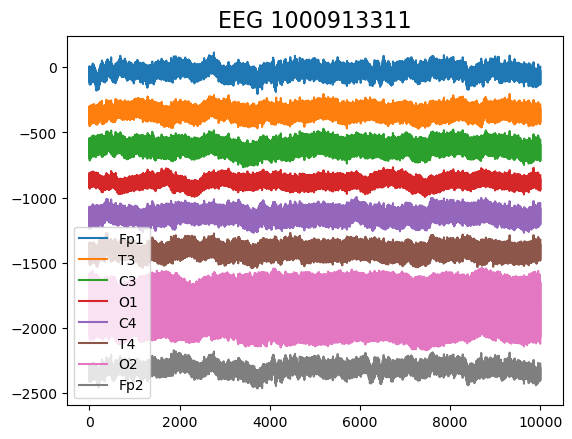

array([[-105.84999847,  -87.76999664,  -79.45999908, ...,  -59.47000122,
          66.48999786,  -88.73000336],
       [ -85.47000122,  -87.51000214,  -60.25999832, ...,  -41.65999985,
         230.66999817,  -68.62999725],
       [   8.84000015,   25.35000038,   56.43000031, ...,   72.02999878,
        -171.30999756,   16.57999992],
       ...,
       [-133.75999451, -104.05999756, -119.18000031, ...,  -68.04000092,
          66.44000244, -107.54000092],
       [ -78.88999939,  -60.02000046,  -60.77000046, ...,  -10.86999989,
         193.83999634,  -52.86999893],
       [   3.77999997,   37.70999908,   41.06000137, ...,   90.91000366,
        -224.05000305,   22.92000008]])

In [ ]:
parquet_path = 'E:/hms-harmful-brain-activity-classification/train_eegs/1000913311.parquet'
eeg_from_parquet(parquet_path, FEATS, display = True)

In [11]:
all_eegs = {}
display = 4
EEG_IDS = train.eeg_id.unique()
PATH = 'E:/hms-harmful-brain-activity-classification/train_eegs'
file_path = 'E:/hms-harmful-brain-activity-classification/eegs.npy'

chunk_size = 1000
for chunk_start in range(0, len(EEG_IDS), chunk_size):
    chunk_end = chunk_start + chunk_size
    print(f"\nProcessing chunk {chunk_start//chunk_size + 1} ({chunk_start}-{chunk_end})")
    
    for i, eeg_id in enumerate(EEG_IDS[chunk_start:chunk_end]):
        # SAVE EEG TO PYTHON DICTIONARY OF NUMPY ARRAYS
        if (i%100==0) and (i!=0): 
            print(f"{i + chunk_start}, ", end='')
        data = eeg_from_parquet(f'{PATH}{eeg_id}.parquet', FEATS=FEATS, display=(i + chunk_start)<DISPLAY)
        all_eegs[eeg_id] = data
        if (i + chunk_start)==DISPLAY:
            if CREATE_EEGS:
                print(f'Processing {train.eeg_id.nunique()} eeg parquets... ',end='')
            else:
                print(f'Reading {len(EEG_IDS)} eeg NumPys from disk.')
                break

[1628180742 2277392603  722738444 ... 1850739625 1306668185  351917269]
17089


In [ ]:
if CREATE_EEGS:
    np.save(file_path, all_eegs) 
else:
all_eegs = np.load('/Users/weijiazhang/Data/HMS_project/eegs.npy',allow_pickle=True).item()